<a href="https://colab.research.google.com/github/fornieligulo/Algiritma_NBC/blob/main/PROJECT_DATA_(aidasayyida_gmail_com).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LABELLING DATASET***

In [ ]:
import pandas as pd

data = pd.read_csv("scrapped_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111042 entries, 0 to 111041
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   userName  111042 non-null  object
 1   score     111042 non-null  int64 
 2   at        111042 non-null  object
 3   content   111042 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


In [ ]:
df  = pd.DataFrame(data[['at','userName','score','content']])

df.head(5)

,at,userName,score,content
0,2024-02-10 03:23:54,Putri Arum,5,mempermudah transfee
1,2024-02-10 03:23:06,Fatimahzahrah Dw,5,kenyamanan bertransaksi dengan ongkos kirim gr...
2,2024-02-10 03:22:42,Ganyuk' 22,4,Mantap
3,2024-02-10 03:17:38,Khusnul Khotimah,5,mudah untuk bertransaksi
4,2024-02-10 03:13:12,Heri Setiawan,1,Kenapa saya mau mengganti nomor hp karna hp be...


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
import numpy as np

sentiments = []

for text in df['content']:
    if isinstance(text, str):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity > 0:
            sentiments.append('positif')
        else:
            sentiments.append('negatif')
    else:
        sentiments.append(np.nan)

df['sentiment'] = sentiments

data = df[['at', 'userName', 'score', 'content', 'sentiment']]
data.head(5)


,at,userName,score,content,sentiment
0,2024-02-10 03:23:54,Putri Arum,5,mempermudah transfee,negatif
1,2024-02-10 03:23:06,Fatimahzahrah Dw,5,kenyamanan bertransaksi dengan ongkos kirim gr...,negatif
2,2024-02-10 03:22:42,Ganyuk' 22,4,Mantap,negatif
3,2024-02-10 03:17:38,Khusnul Khotimah,5,mudah untuk bertransaksi,negatif
4,2024-02-10 03:13:12,Heri Setiawan,1,Kenapa saya mau mengganti nomor hp karna hp be...,negatif


<ipython-input-5-822debc4cd00>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


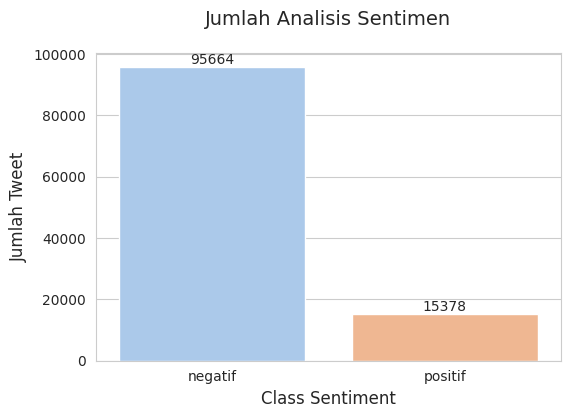

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment',fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

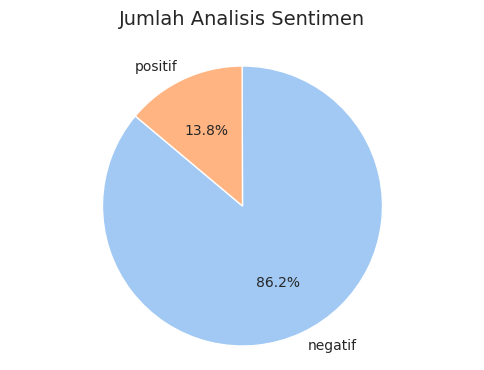

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))

# Menggambar diagram lingkaran
colors = sns.color_palette('pastel')
plt.pie(sentiment_count.values, labels=sentiment_count.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.axis('equal')  # Membuat diagram lingkaran menjadi lingkaran yang sejati

plt.show()


In [ ]:
data.to_csv('Hasil_Labelling_Data.csv',encoding='utf8', index=False)

In [ ]:
# Eksport ke file CSV terpisah berdasarkan label sentimen
for sentiment_label in ['positif', 'negatif', 'netral']:
    # Filter data sesuai dengan label sentimen
    filtered_data = df[df['sentiment'] == sentiment_label]

    # Tentukan nama file berdasarkan label sentimen
    filename = f"{sentiment_label}_dataset.csv"

    # Eksport data yang telah difilter ke file CSV
    filtered_data.to_csv(filename, index=False)

# ***ALGORITMA RANDOM FOREST***

In [ ]:
# Impor pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membaca dataset
data = pd.read_csv('Hasil_Labelling_Data.csv')

# Pisahkan fitur dan label
X = data['content']
y = data['sentiment']

In [ ]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

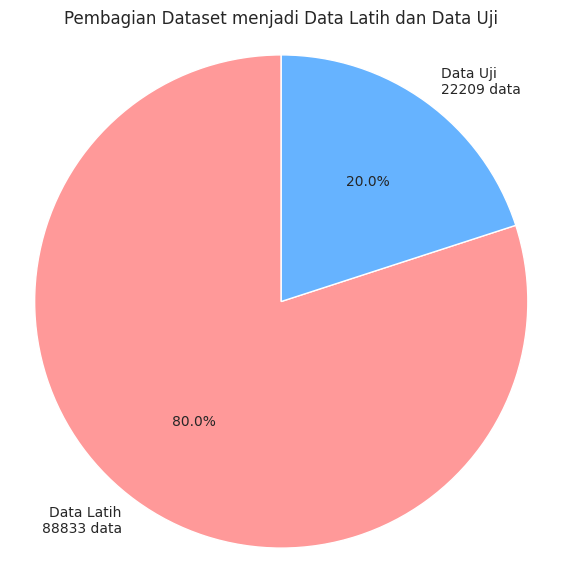

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Label untuk plot
labels = ['Data Latih', 'Data Uji']
sizes = [train_size, test_size]
colors = ['#ff9999','#66b3ff']

# Label untuk plot
labels = ['Data Latih\n' + str(train_size) + ' data', 'Data Uji\n' + str(test_size) + ' data']
sizes = [train_size, test_size]
colors = ['#ff9999','#66b3ff']

# Buat plot lingkaran
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Pembagian Dataset menjadi Data Latih dan Data Uji')
plt.axis('equal')  # Membuat lingkaran berbentuk lingkaran
plt.show()


In [ ]:
import pandas as pd

# Membuat dataframe dari data latih dan data uji
df_train = pd.DataFrame({'content': X_train, 'sentiment': y_train})
df_test = pd.DataFrame({'content': X_test, 'sentiment': y_test})

# Menyimpan data latih dan data uji ke file CSV
df_train.to_csv('train_data.csv', index=False)
df_test.to_csv('test_data.csv', index=False)

print("Data latih dan data uji telah diekspor ke file CSV: train_data.csv dan test_data.csv")


Data latih dan data uji telah diekspor ke file CSV: train_data.csv dan test_data.csv


In [ ]:
# Membuat vektor fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Inisialisasi klasifier Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data latih
random_forest.fit(X_train_vectorized, y_train)

# Lakukan prediksi pada data uji
predictions = random_forest.predict(X_test_vectorized)

In [ ]:
# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)
print("Akurasi:", accuracy)

# Hasil prediksi dan label sebenarnya
print("Prediksi:", predictions)

Akurasi: 0.9801431851951912
Prediksi: ['negatif' 'positif' 'negatif' ... 'negatif' 'negatif' 'negatif']


In [ ]:
from sklearn.metrics import classification_report

# Lakukan prediksi pada data uji
predictions = random_forest.predict(X_test_vectorized)

# Buat laporan klasifikasi
report = classification_report(y_test, predictions)

# Print laporan klasifikasi
print("Laporan Klasifikasi:\n", report)


Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.98      1.00      0.99     19136
     positif       0.97      0.88      0.92      3073

    accuracy                           0.98     22209
   macro avg       0.98      0.94      0.96     22209
weighted avg       0.98      0.98      0.98     22209



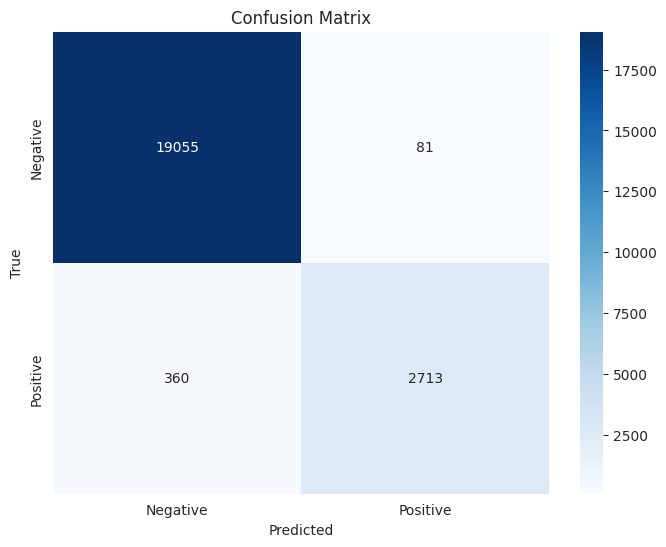

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghasilkan confusion matrix
cm = confusion_matrix(y_test, predictions)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# ***RATING***

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111042 entries, 0 to 111041
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   at         111042 non-null  object
 1   userName   111042 non-null  object
 2   score      111042 non-null  int64 
 3   content    111042 non-null  object
 4   sentiment  111042 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


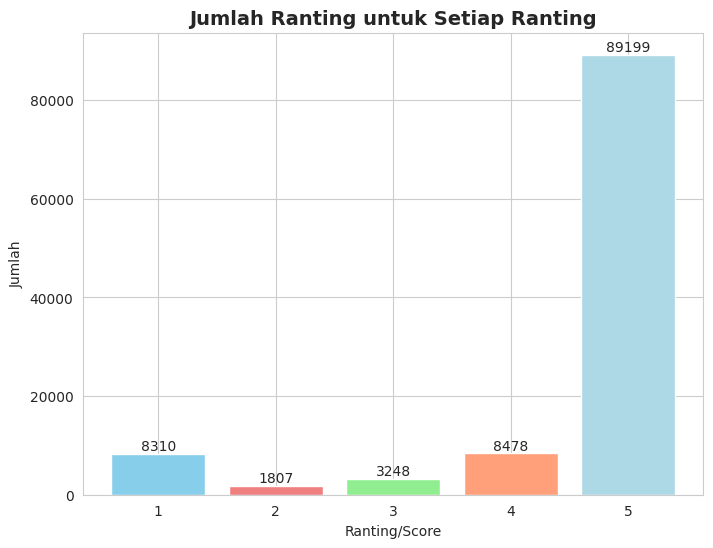

In [ ]:
import matplotlib.pyplot as plt

rating_counts = data['score'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ranting untuk Setiap Ranting', fontsize=14, fontweight='bold')
plt.xlabel('Ranting/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()


# ***WORDCLOUD***

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head(100)

,at,userName,score,content,sentiment
0,2024-02-10 03:23:54,Putri Arum,5,mempermudah transfee,negatif
1,2024-02-10 03:23:06,Fatimahzahrah Dw,5,kenyamanan bertransaksi dengan ongkos kirim gr...,negatif
2,2024-02-10 03:22:42,Ganyuk' 22,4,Mantap,negatif
3,2024-02-10 03:17:38,Khusnul Khotimah,5,mudah untuk bertransaksi,negatif
4,2024-02-10 03:13:12,Heri Setiawan,1,Kenapa saya mau mengganti nomor hp karna hp be...,negatif
...,...,...,...,...,...
95,2024-02-09 14:59:36,lecsy hendratmoko,5,mantap dan luar biasa,negatif
96,2024-02-09 14:55:31,mul iyadi,5,Good's......👍👍👍,positif
97,2024-02-09 14:54:51,Muhammad rahmani Rahmani,5,👍👍👍,negatif
98,2024-02-09 14:50:16,Naim Nam,1,Aplikasi kok tiba tiba kluar .... Tambah kesin...,negatif


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['sentiment'] == 'negatif']['content'].str.cat(sep=' ')
sentimen_positif = data[data['sentiment'] == 'positif']['content'].str.cat(sep=' ')

In [ ]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

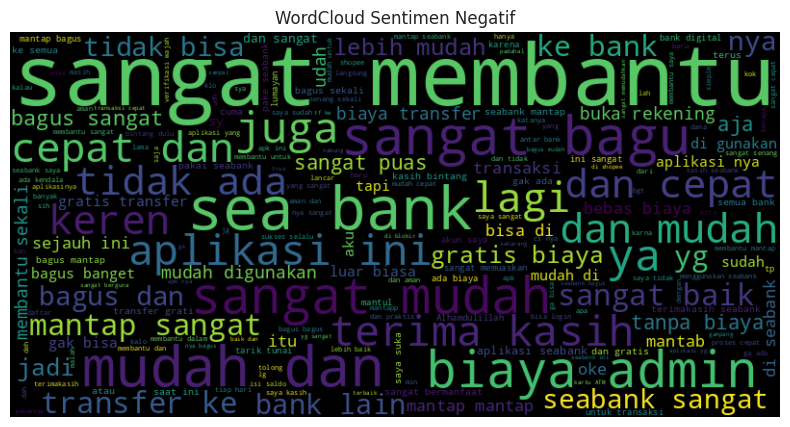

In [ ]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

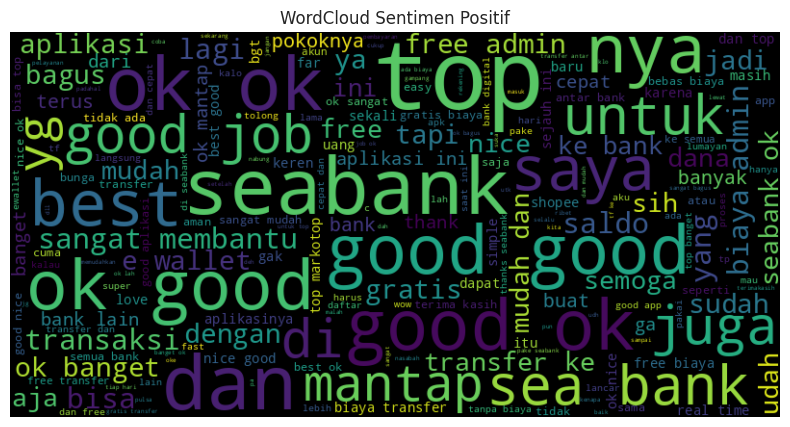

In [ ]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

In [ ]:
!pip install wordcloud
!pip install matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

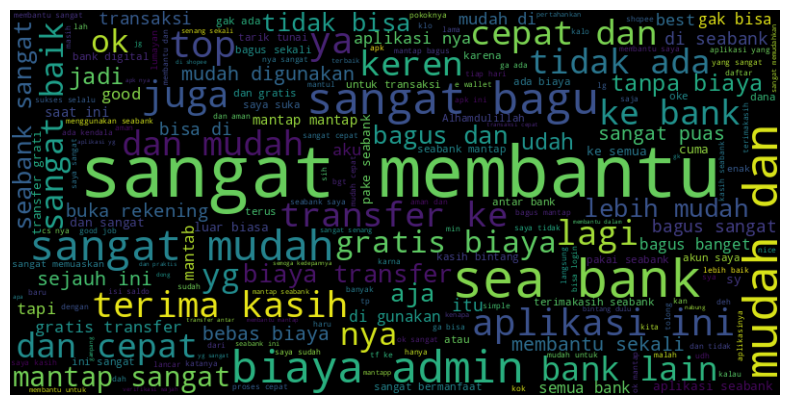

In [ ]:
# Menggabungkan teks dalam kolom 'steming_data' menjadi satu string
text = ' '.join(data['content'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))

# Membuat objek WordCloud dengan lebar 800, tinggi 400, dan latar belakang hitam
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Membuat plot dengan ukuran 10x5 inci
plt.figure(figsize=(10, 5))

# Menampilkan word cloud dengan interpolasi gambar bilinear
plt.imshow(wordcloud, interpolation='bilinear')

# Menghilangkan sumbu x dan y pada plot
plt.axis("off")

# Menampilkan plot
plt.show()


CONNECT

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head(5)

,at,userName,score,content,sentiment
0,2024-02-10 03:23:54,Putri Arum,5,mempermudah transfee,negatif
1,2024-02-10 03:23:06,Fatimahzahrah Dw,5,kenyamanan bertransaksi dengan ongkos kirim gr...,negatif
2,2024-02-10 03:22:42,Ganyuk' 22,4,Mantap,negatif
3,2024-02-10 03:17:38,Khusnul Khotimah,5,mudah untuk bertransaksi,negatif
4,2024-02-10 03:13:12,Heri Setiawan,1,Kenapa saya mau mengganti nomor hp karna hp be...,negatif


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111042 entries, 0 to 111041
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   at         111042 non-null  object
 1   userName   111042 non-null  object
 2   score      111042 non-null  int64 
 3   content    111042 non-null  object
 4   sentiment  111042 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


In [ ]:
!pip install streamlit


In [ ]:
import streamlit as st
import pandas as pd

def main():
    st.title("Data Viewer")

    # Load your dataset
    df = load_data()

    # Display the dataset
    st.write("## Dataset")
    st.write(df)

def load_data():
    # Load your dataset from CSV
    # Update the file path according to the location of your CSV file
    df = pd.read_csv('Hasil_Labelling_Data.csv')
    return df

if __name__ == '__main__':
    main()


In [ ]:
!streamlit run --browser.gatherUsageStats False /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.16.169:8501

  Stopping...
  Stopping...
